In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\Users\lenovo\Desktop\Cat_V_Dog_Classification\train' , # path of your located data 
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)



Validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\Users\lenovo\Desktop\Cat_V_Dog_Classification\test' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalize 
def Process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label


train_ds = train_ds.map(Process)
Validation_ds = Validation_ds.map(Process)

In [5]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation ='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
model.add(Dropout(0.3))  # Increased dropout rate
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))   # L2 regularization
model.add(Dropout(0.3))  # Increased dropout rate
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [24]:
history = model.fit(train_ds,epochs = 12,validation_data = Validation_ds)

Epoch 1/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5341 - loss: 5.8585 - val_accuracy: 0.5900 - val_loss: 1.6569
Epoch 2/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5973 - loss: 1.5016 - val_accuracy: 0.5504 - val_loss: 1.1609
Epoch 3/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6487 - loss: 0.9975 - val_accuracy: 0.6888 - val_loss: 0.8147
Epoch 4/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7317 - loss: 0.7783 - val_accuracy: 0.7506 - val_loss: 0.7326
Epoch 5/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7766 - loss: 0.7400 - val_accuracy: 0.7754 - val_loss: 0.7611
Epoch 6/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.7922 - loss: 0.7517 - val_accuracy: 0.8002 - val_loss: 0.7314
Epoch 7/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.8110 - loss: 0.8012 - val_accuracy: 0.7168 - val_loss: 1.2040
Epoch 8/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8354 - loss: 0.9142 - 

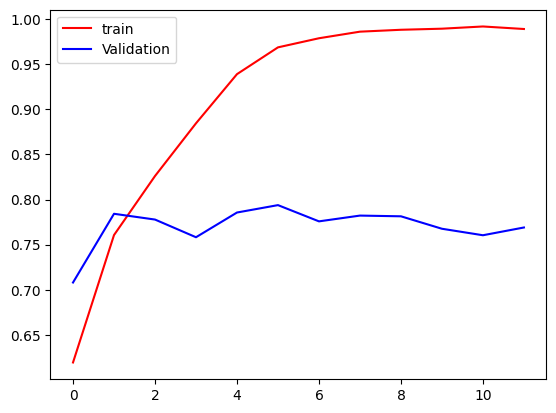

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

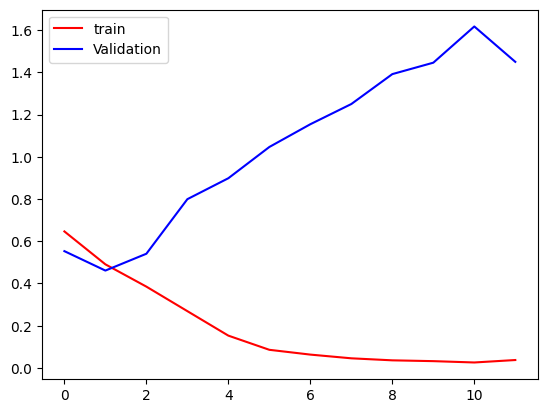

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

---
# After Batch Normalization and Dropout

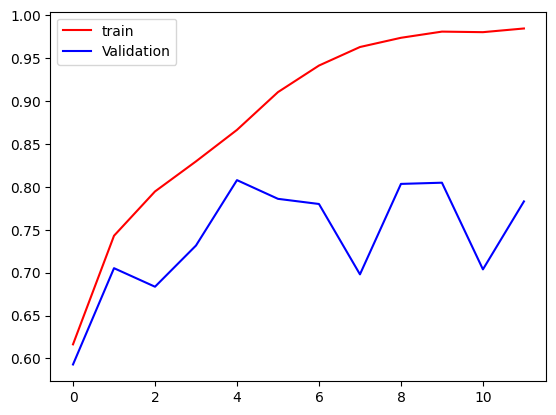

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

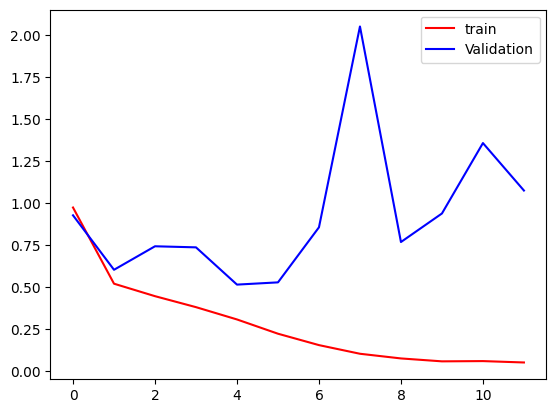

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

---
# After Regularization tecnique

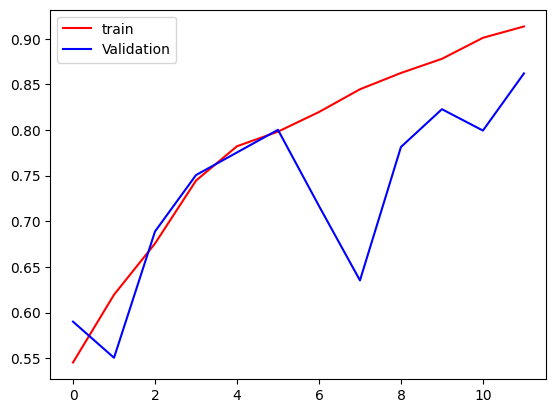

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

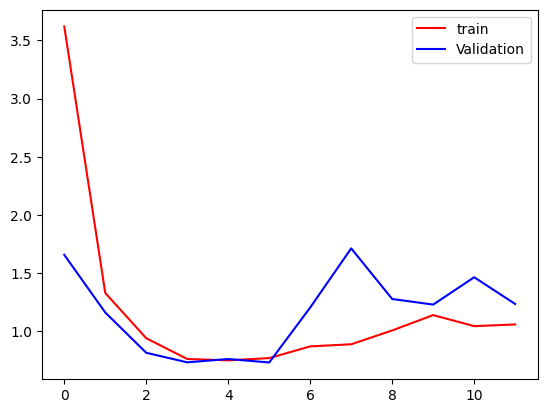

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

---
# Prediction

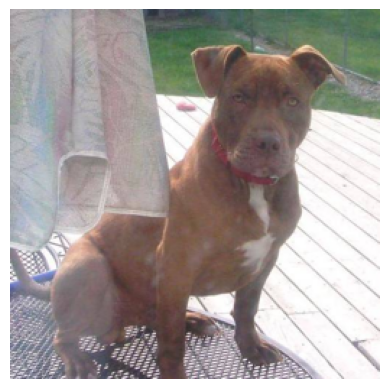

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
img1 = Image.open('/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg')

# Convert the image to a format suitable for displaying
img1 = img1.resize((256, 256))  # Resize if needed
img1 = img1.convert('RGB')  # Ensure it's in RGB format

# Display the image
plt.imshow(img1)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [38]:
from PIL import Image

# Load the image as a PIL object
img1 = Image.open('/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg')

# Preprocess the PIL image
def preprocess_image(pil_image):
    # Resize the image to the target size
    img = pil_image.resize((256, 256))
    # Convert the image to an array
    img_array = img_to_array(img)
    # Scale the pixel values to [0, 1] range
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape (1, 256, 256, 3)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preprocess the image
preprocessed_image = preprocess_image(img1)

# Perform prediction
predictions = model.predict(preprocessed_image)

# Since it's a binary classification, apply a threshold
predicted_class = (predictions[0][0] > 0.5).astype(int)

# Output the prediction
print(f'Predicted class: {predicted_class}')
print(f'Prediction probability: {predictions[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
Predicted class: 1
Prediction probability: 0.6184831261634827
